**PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Layer,Lambda

In [22]:
data=pd.read_csv("forestfires.csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [23]:
data=data.drop(columns=['month','day'], axis=1)
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [24]:
df=data

In [25]:
df.shape

(517, 29)

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
# convering the size_category column into Labels by using label encoder

label_encoder = LabelEncoder()
df['size_category'] = label_encoder.fit_transform(df.size_category)

In [30]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [31]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,0.731141
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,0.443796
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df['size_category'].value_counts()

size_category
1    378
0    139
Name: count, dtype: int64

In [33]:
df.dtypes

FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category      int32
dtype: object

In [34]:
x=df.iloc[:,0:28]
y=df.iloc[:,28]

In [35]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

<Axes: >

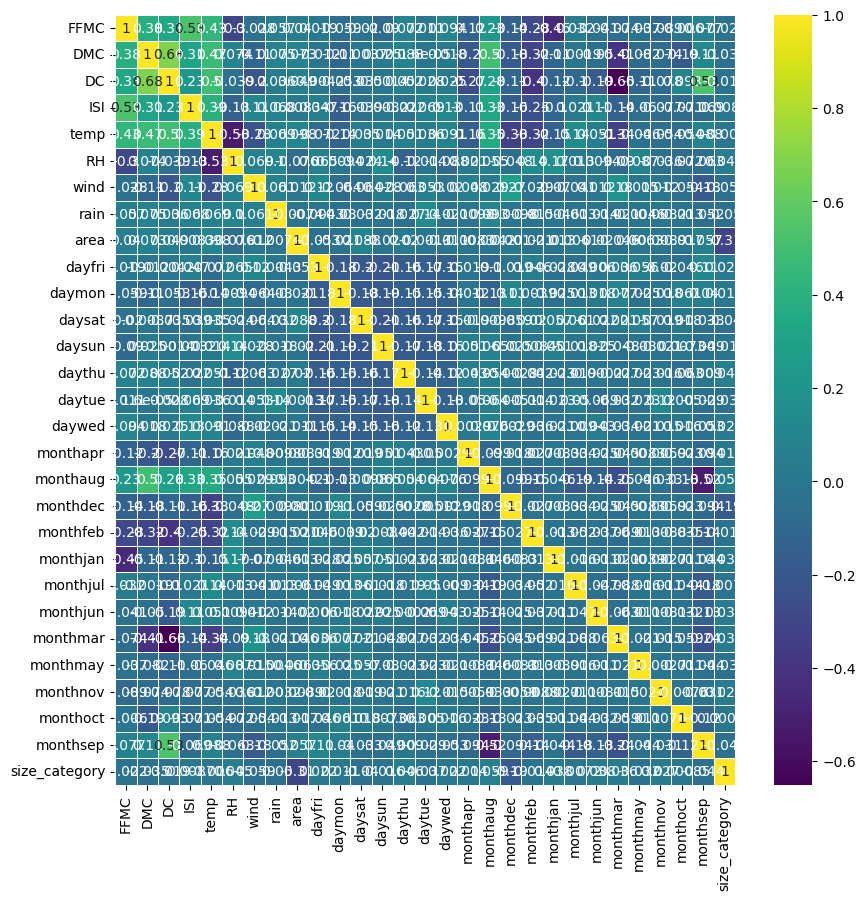

In [37]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.5)

In [38]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
x_std = std.fit_transform(x)

In [39]:
# Finding Categorical Data :
print("The FFMC column")
print(df['FFMC'].value_counts())
print()
print("The DMC column")
print(df['DMC'].value_counts())
print()
print("The DC column")
print(df['DC'].value_counts())
print()
print("The ISI column")
print(df['ISI'].value_counts())
print()
print("The TEMP column")
print(df['temp'].value_counts())
print()
print("The RH column")
print(df['RH'].value_counts())
print()
print("The WIND column")
print(df['wind'].value_counts())
print()
print("The RAIN column")
print(df['rain'].value_counts())
print()
print("The AREA column")
print(df['area'].value_counts())
print()
print("The SIZE-CATEGORY column")
print(df['size_category'].value_counts())
print()

The FFMC column
FFMC
92.1    28
91.6    28
91.0    22
91.7    19
92.4    16
        ..
86.9     1
85.2     1
53.4     1
85.1     1
94.4     1
Name: count, Length: 106, dtype: int64

The DMC column
DMC
99.0     10
129.5     9
231.1     8
142.4     8
35.8      7
         ..
138.1     1
109.2     1
91.6      1
122.3     1
146.0     1
Name: count, Length: 215, dtype: int64

The DC column
DC
745.3    10
692.6     9
692.3     8
715.1     8
698.6     8
         ..
565.5     1
503.6     1
589.9     1
85.3      1
106.7     1
Name: count, Length: 219, dtype: int64

The ISI column
ISI
9.6     23
7.1     21
6.3     20
8.4     17
7.0     17
        ..
16.5     1
2.2      1
8.3      1
2.0      1
1.1      1
Name: count, Length: 119, dtype: int64

The TEMP column
temp
17.4    8
19.6    8
15.4    7
20.6    7
20.4    6
       ..
16.3    1
12.8    1
10.4    1
8.7     1
25.6    1
Name: count, Length: 192, dtype: int64

The RH column
RH
27    33
39    24
35    20
43    17
42    17
      ..
96     1
97     

In [41]:
size_category_map = {"small":0, "large":1}
df["size_category"] = df["size_category"].map(size_category_map)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,NaN
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,NaN
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,NaN
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,NaN
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,NaN


In [42]:
df['size_category'].value_counts()

Series([], Name: count, dtype: int64)

In [43]:
df.shape

(517, 29)

In [44]:
# Splitting data into Train and Test Data Set :
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y)

In [45]:
def prep_model(hidden_dim):
    model = Sequential()
    
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else :
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

    return model

In [46]:
f_model = prep_model([28,50,40,20,1])
history = f_model.fit(np.array(x_train),np.array(y_train),epochs=500)

Epoch 1/500
12/12 [==============================] - 2s 5ms/step - loss: 0.8676 - accuracy: 0.5928
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6375 - accuracy: 0.6981
Epoch 3/500
12/12 [==============================] - 0s 6ms/step - loss: 0.5787 - accuracy: 0.7313
Epoch 4/500
12/12 [==============================] - 0s 6ms/step - loss: 0.5499 - accuracy: 0.7313
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 0.5628 - accuracy: 0.7396
Epoch 6/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4824 - accuracy: 0.7922
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 0.4967 - accuracy: 0.8116
Epoch 8/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4833 - accuracy: 0.7867
Epoch 9/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4874 - accuracy: 0.7867
Epoch 10/500
12/12 [==============================] - 0s 4ms/step - loss: 0.4401 - accuracy: 0.8116
Epoch 11/

In [47]:
pred_train = f_model.predict(np.array(x_train))
pred_train = pd.Series([i[0] for i in pred_train])
pred_train

12/12 [==============================] - 0s 3ms/step


0      1.000000e+00
1      1.000000e+00
2      0.000000e+00
3      1.000000e+00
4      1.000000e+00
           ...     
356    2.740766e-27
357    1.000000e+00
358    1.429580e-36
359    1.000000e+00
360    1.000000e+00
Length: 361, dtype: float32

In [48]:
train = pd.concat([x_train,y_train],axis=1)
train["size_category"].value_counts()

size_category
1    264
0     97
Name: count, dtype: int64

In [49]:
size = ["small","large"]
pred_train_class = pd.Series(["small"]*361)
pred_train_class[[i>0.5 for i in pred_train]]= "large"
pred_train_class

0      large
1      large
2      small
3      large
4      large
       ...  
356    small
357    large
358    small
359    large
360    large
Length: 361, dtype: object

In [50]:
#For training data
from sklearn.metrics import confusion_matrix

train["original_class"] = "small"
train.loc[train["size_category"]==1,"original_class"] = "large"
train.original_class.value_counts()

confusion_matrix(pred_train_class,train["original_class"])
np.mean(pred_train_class==pd.Series(train["original_class"]).reset_index(drop=True))
pd.crosstab(pred_train_class,pd.Series(train["original_class"]).reset_index(drop=True))

original_class,large,small
row_0,,
large,264,0
small,0,97


In [51]:
#For test data
pred_test = f_model.predict(np.array(x_test))
pred_test = pd.Series([i[0] for i in pred_test])
pred_test_class = pd.Series(["small"]*156)
pred_test_class[[i>0.5 for i in pred_test]] = "large"

test =pd.concat([x_test,y_test],axis=1)
test["original_class"]="small"
test.loc[test["size_category"]==1,"original_class"] = "large"
test["original_class"].value_counts()

np.mean(pred_test_class==pd.Series(test["original_class"]).reset_index(drop=True))
confusion_matrix(pred_test_class,test["original_class"])
pd.crosstab(pred_test_class,pd.Series(test["original_class"]).reset_index(drop=True))

5/5 [==============================] - 0s 4ms/step


original_class,large,small
row_0,,
large,112,5
small,2,37


In [52]:
#evaluation
scores = f_model.evaluate(x,y)
print("%s: %.2f%%" % (f_model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 1s 3ms/step - loss: 0.1259 - accuracy: 0.9865
accuracy: 98.65%


In [53]:
# list all data in history
f_model.history.history.keys()

dict_keys([])

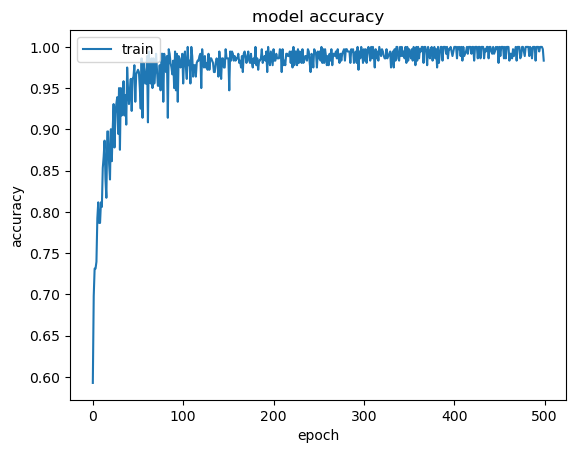

In [54]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

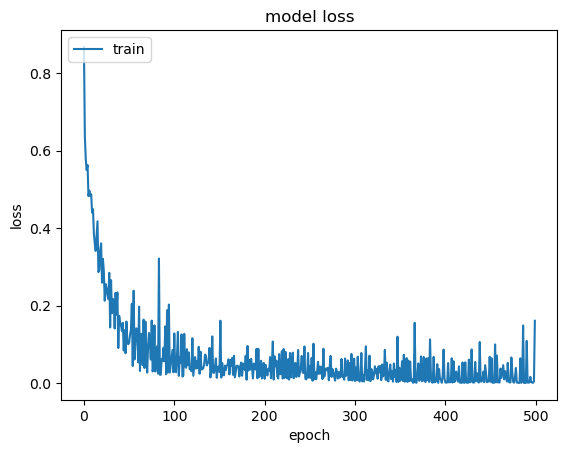

In [55]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.**

In [56]:
df1=pd.read_csv("gas_turbines.csv")
df1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [57]:
df1.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [58]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,0.0
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,NaN
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,NaN
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


AT


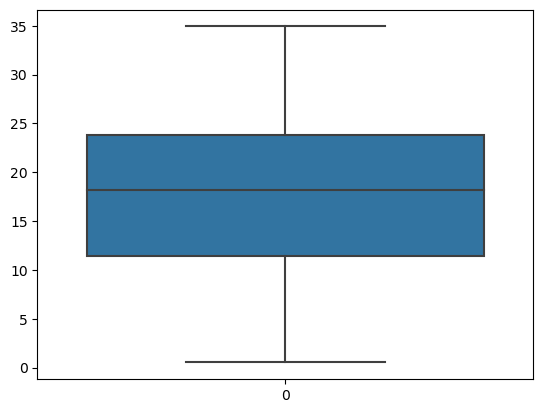

AP


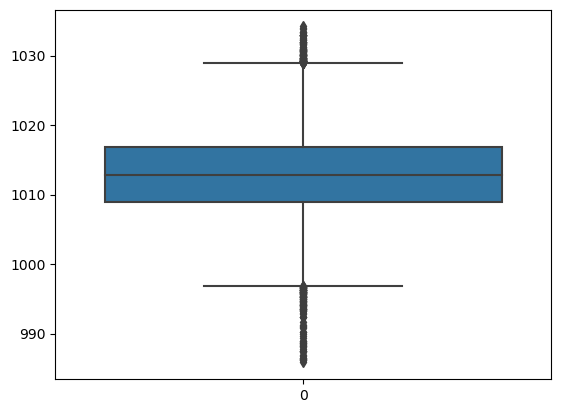

AH


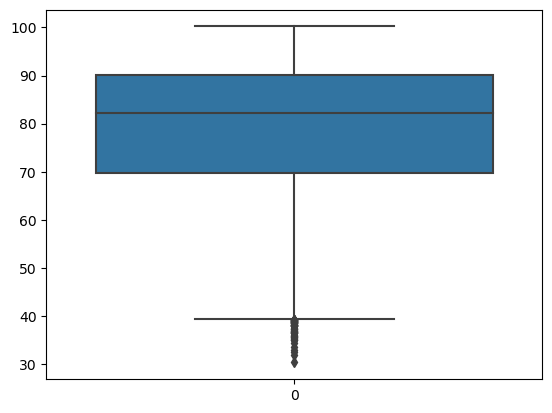

AFDP


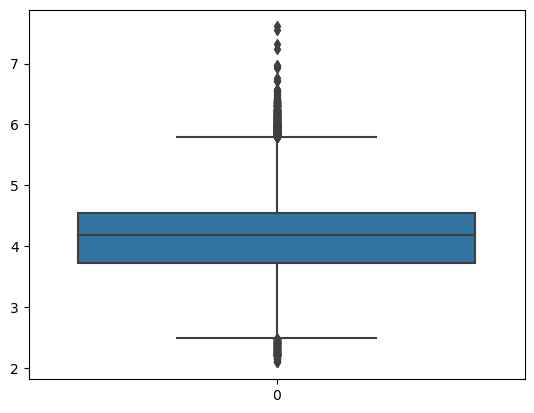

GTEP


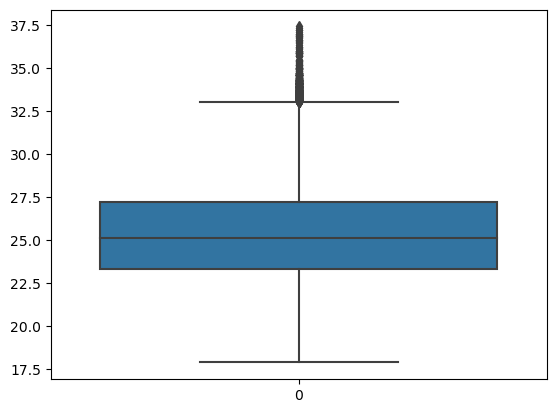

TIT


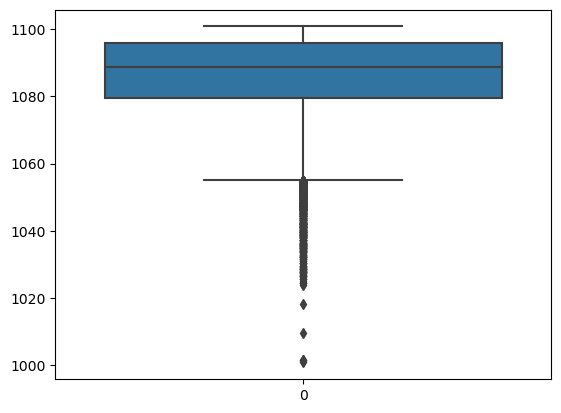

TAT


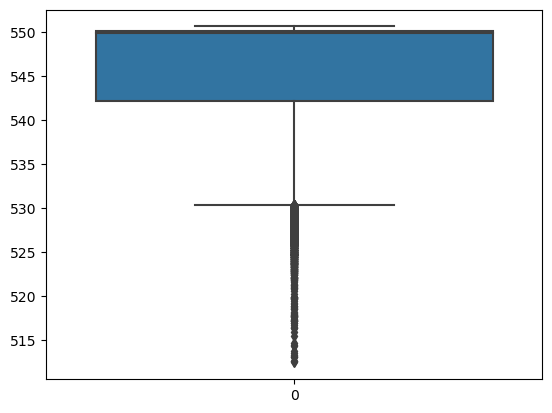

TEY


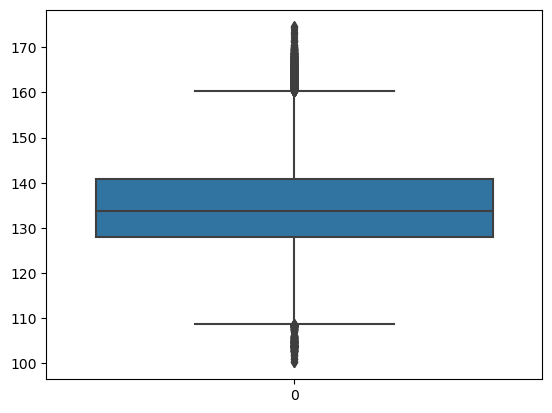

CDP


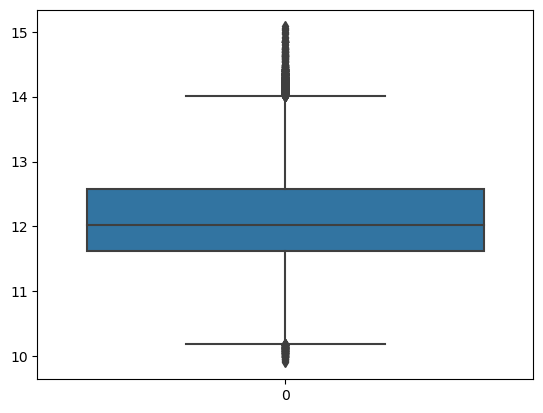

CO


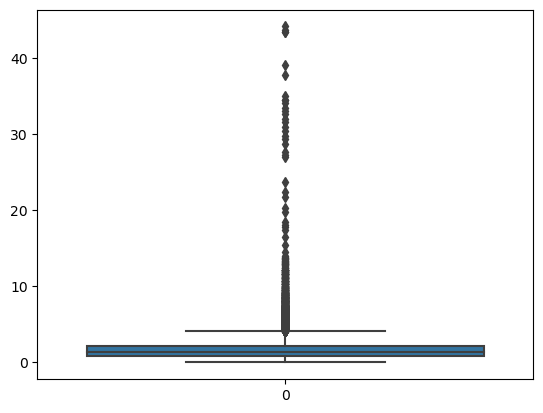

NOX


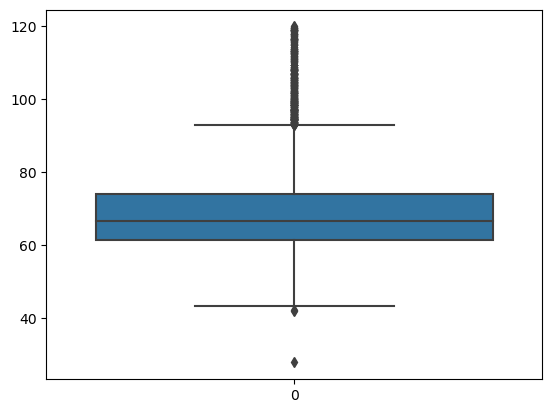

In [59]:
for i in df1.columns:
    print(i)
    sns.boxplot(df1[i])
    plt.show()

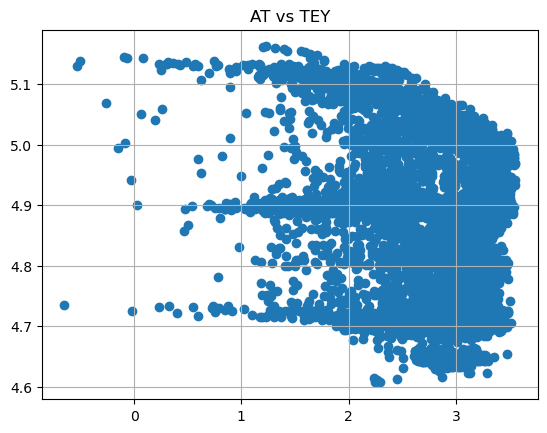

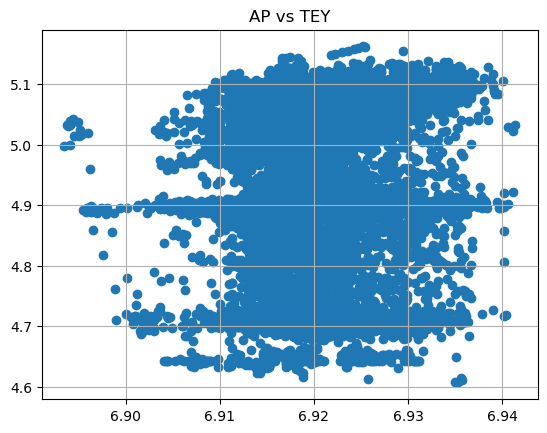

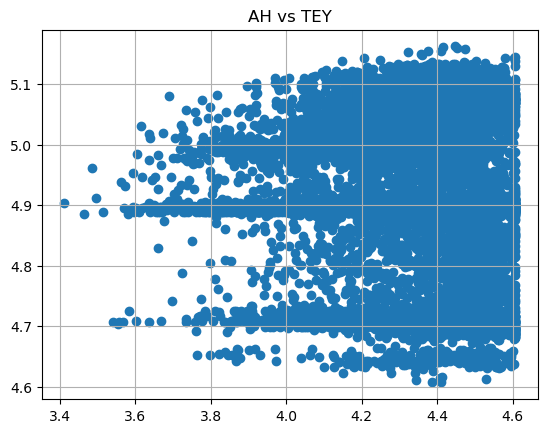

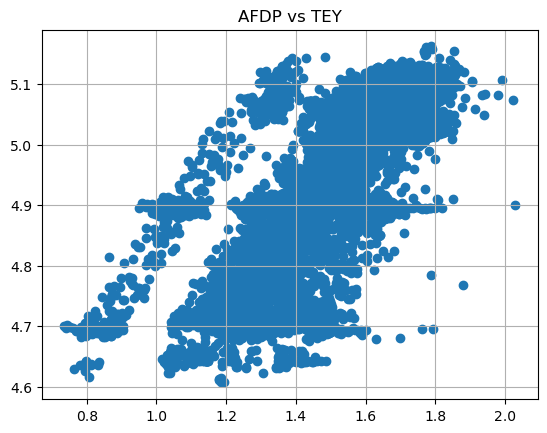

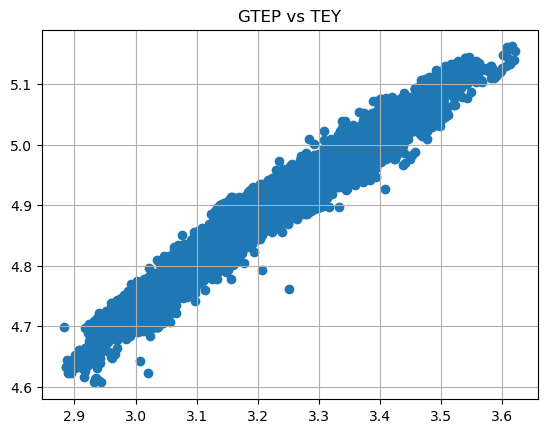

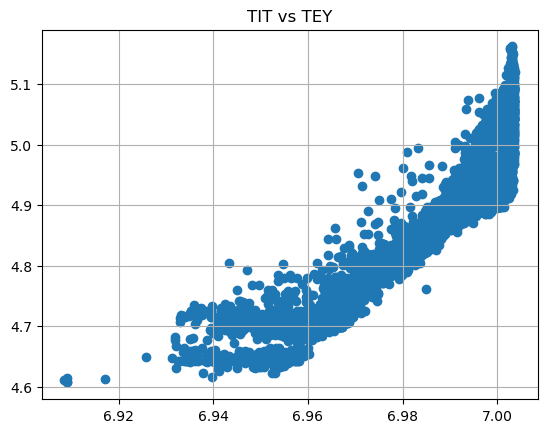

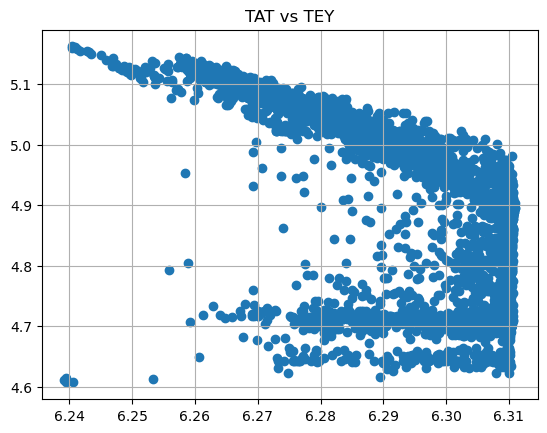

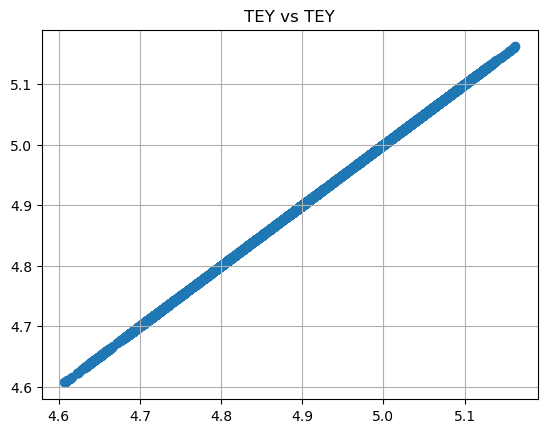

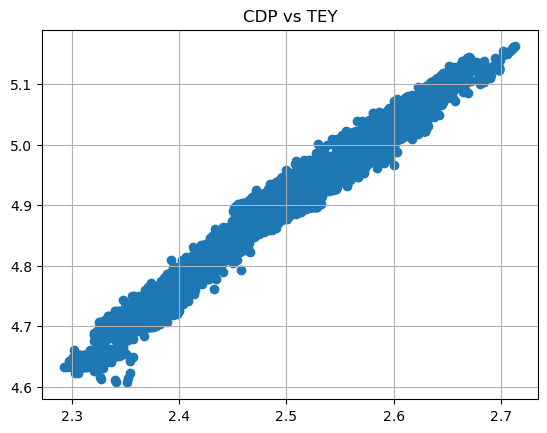

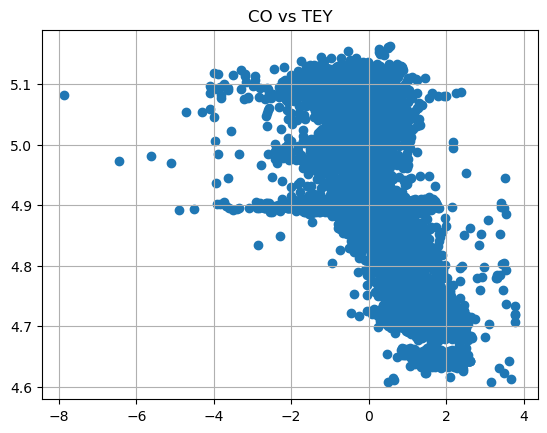

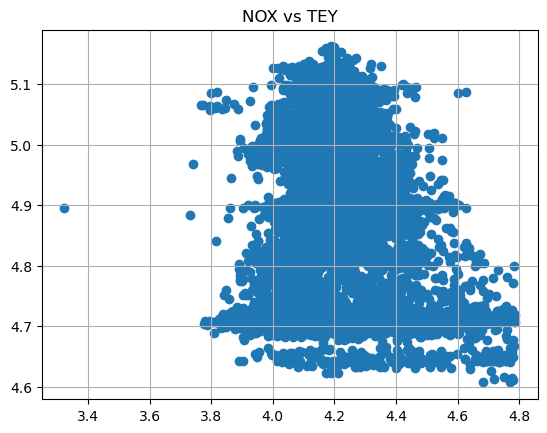

In [60]:
for i in df1.columns:
    plt.scatter(np.log(df1[i]), np.log(df1['TEY']))
    plt.title(i+ ' vs TEY')
    plt.grid()
    plt.show()

<Axes: >

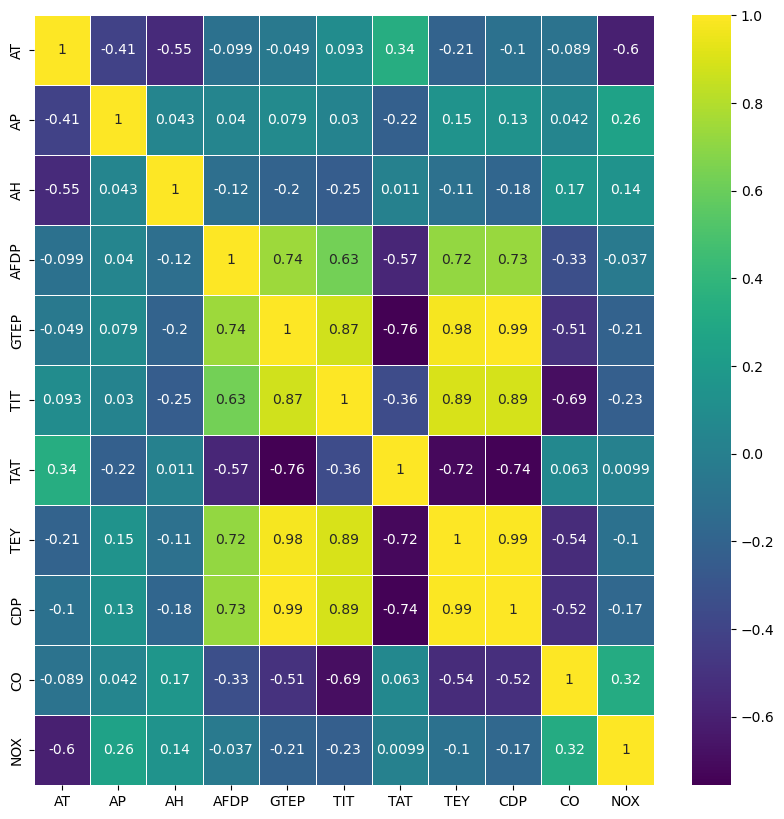

In [61]:
plt.figure(figsize = (10,10))
sns.heatmap(df1 .corr(),annot=True,cmap="viridis",linewidths=0.5)

In [62]:
#caergorical data

print("The AT column")
print(df1['AT'].value_counts())
print()
print("The AP column")
print(df1['AP'].value_counts())
print()
print("The AH column")
print(df1['AH'].value_counts())
print()
print("The AFDP column")
print(df1['AFDP'].value_counts())
print()
print("The GTEP column")
print(df1['GTEP'].value_counts())
print()
print("The TIT column")
print(df1['TIT'].value_counts())
print()
print("The TAT column")
print(df1['TAT'].value_counts())
print()
print("The TEY column")
print(df1['TEY'].value_counts())
print()
print("The CDP column")
print(df1['CDP'].value_counts())
print()
print("The CO column")
print(df1['CO'].value_counts())
print()
print("The NOX column")
print(df1['NOX'].value_counts())
print()

The AT column
AT
20.1350    5
25.9690    5
14.0430    5
20.1690    5
20.7200    5
          ..
17.7090    1
17.2890    1
17.1100    1
17.2850    1
6.9279     1
Name: count, Length: 12086, dtype: int64

The AP column
AP
1011.80    129
1012.10    127
1011.90    121
1010.80    119
1013.60    118
          ... 
996.30       1
998.02       1
998.48       1
998.88       1
1029.80      1
Name: count, Length: 540, dtype: int64

The AH column
AH
100.140    31
100.150    29
100.110    28
100.120    24
100.130    19
           ..
57.187      1
60.104      1
62.370      1
67.608      1
97.533      1
Name: count, Length: 12637, dtype: int64

The AFDP column
AFDP
4.5032    7
4.4361    6
3.8837    6
4.4273    6
4.2500    6
         ..
4.5599    1
4.6085    1
4.5880    1
4.5110    1
3.4770    1
Name: count, Length: 11314, dtype: int64

The GTEP column
GTEP
25.487    9
25.552    9
24.308    9
24.288    9
24.361    9
         ..
25.686    1
22.525    1
25.485    1
20.980    1
19.164    1
Name: count, Le

In [63]:
df1.shape

(15039, 11)

In [64]:
# Defining Predictors and Target Variables :
predic_1 = df1.iloc[:,0:7]
predic_2 = df1.iloc[:,8:]
predic = predic_1.join(predic_2)

target = df1.iloc[:,7]

In [65]:
predic

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [66]:
target

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [67]:

# Splitting data into Train and Test Data Set :
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(predic,target,test_size=0.3,random_state=0)

In [68]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [69]:
#input layer + 1st hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

#adding 2nd layer
ann.add(tf.keras.layers.Dense(units =6,activation='relu'))

#adding the output layer
ann.add(tf.keras.layers.Dense(units=1))


#Training the ANN
#compililng the ANN
ann.compile(optimizer='adam',loss = 'mean_squared_error')

In [70]:
hist = ann.fit(x_train,y_train,batch_size=32, epochs= 100)

Epoch 1/100
329/329 [==============================] - 3s 3ms/step - loss: 629.8088
Epoch 2/100
329/329 [==============================] - 1s 4ms/step - loss: 52.4606
Epoch 3/100
329/329 [==============================] - 1s 4ms/step - loss: 41.5231
Epoch 4/100
329/329 [==============================] - 1s 4ms/step - loss: 30.6751
Epoch 5/100
329/329 [==============================] - 1s 4ms/step - loss: 21.7591
Epoch 6/100
329/329 [==============================] - 1s 4ms/step - loss: 15.3579
Epoch 7/100
329/329 [==============================] - 1s 4ms/step - loss: 11.3413
Epoch 8/100
329/329 [==============================] - 1s 4ms/step - loss: 8.8405
Epoch 9/100
329/329 [==============================] - 1s 4ms/step - loss: 7.4539
Epoch 10/100
329/329 [==============================] - 1s 4ms/step - loss: 6.1577
Epoch 11/100
329/329 [==============================] - 1s 4ms/step - loss: 5.3124
Epoch 12/100
329/329 [==============================] - 1s 4ms/step - loss: 4.6821
Epoch

In [71]:
p_train = ann.predict(np.array(x_train))
p_train = pd.Series([i[0] for i in p_train])
p_train

329/329 [==============================] - 1s 3ms/step


0        124.345222
1        133.763092
2        134.118958
3        151.344208
4        134.127258
            ...    
10522    112.029190
10523    133.543213
10524    154.206940
10525    125.897774
10526    109.781807
Length: 10527, dtype: float32

In [72]:
# evaluate the model
scores = ann.evaluate(predic, target)
print("%s: %.2f%%" % (ann.metrics_names[0], scores*100))

470/470 [==============================] - 2s 3ms/step - loss: 0.9172
loss: 91.72%
